In [253]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [254]:
stuff=np.load('sidebands.npz')
t=stuff['time']
d=stuff['signal']


In [255]:
def analytic_dev(p,t):
    
    y = p[0]/(1 + ((t - p[1])/p[2])**2)

    grad = np.zeros([t.size, p.size])

    grad[:,0] = 1.0/(1 + ((t - p[1])/p[2])**2)
    grad[:,1] = 2*p[0]*p[2]**2*(t-p[1])/((t - p[1])**2 + p[2]**2)**2
    grad[:,2] = 2*p[0]*p[2]*(t-p[1])**2/((t - p[1])**2 + p[2]**2)**2

    return y, grad

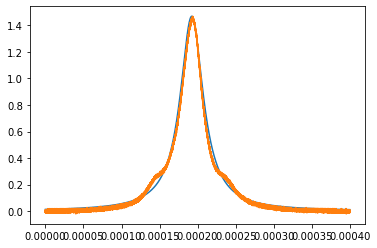

In [256]:
plt.plot(t,analytic_dev(np.array([max(d), 0.0001923, 0.0000185]),t)[0])
plt.plot(t,d)

[1.42113712e+00 1.92341699e-04 1.79752584e-05] 101.07114289253195
[1.42265692e+00 1.92357528e-04 1.79274442e-05] 63.70670195053774
[1.42279999e+00 1.92358562e-04 1.79239597e-05] 63.67283277258047
[1.42280990e+00 1.92358643e-04 1.79237105e-05] 63.67266320499407
[1.42281062e+00 1.92358649e-04 1.79236922e-05] 63.672662311918835
[1.42281068e+00 1.92358649e-04 1.79236909e-05] 63.67266230719842
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717346
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717334
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.672662307173326
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.672662307173326
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717333
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717333


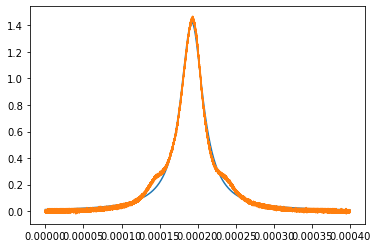

In [257]:
p0 = np.array([max(d), 0.0001923, 0.0000185])
p=p0.copy()
for j in range(12):
    pred,grad=analytic_dev(p,t)
    r=d-pred
    err=(r**2).sum()
    r=np.matrix(r).transpose()
    grad=np.matrix(grad)

    lhs=grad.transpose()*grad
    rhs=grad.transpose()*r
    dp=np.linalg.inv(lhs)*(rhs)
    for jj in range(p.size):
        p[jj]=p[jj]+dp[jj]
    print(p,err)
plt.plot(t,pred)
plt.plot(t,d)


In [258]:
N=np.mean((d - analytic_dev(p,t)[0])**2)
par_errs=np.sqrt(N*np.diag(np.linalg.inv(lhs)))
par_errs

array([4.25479046e-04, 5.35834556e-09, 7.58809724e-09])

In [259]:
N=np.sum((d - analytic_dev(p,t)[0])**2/(analytic_dev(p,t)[0]))
par_errs=np.sqrt(N*np.diag(np.linalg.inv(lhs)))
par_errs

array([4.62125650e-01, 5.81986105e-06, 8.24166174e-06])

In [260]:
def f(p,t):
    return p[0]/(1 + ((t - p[1])/p[2])**2)

In [261]:
def ndiff2(f,p,t):
    
    dx = t[1]-t[0]
    
    def T(f,p,t,i,dx):
        l = p.copy()
        l[i] += dx
        return f(l,t)

    grad = np.zeros([t.size, p.size])

    for i in range(p.size):
         grad[:,i] = (T(f,p,t,i,dx)-T(f,p,t,i,-dx))/(2*dx)

    return grad

[1.42113712e+00 1.92341699e-04 1.79752584e-05] 101.07114289253195
[1.42265692e+00 1.92357528e-04 1.79274442e-05] 63.70670195576228
[1.42279999e+00 1.92358562e-04 1.79239596e-05] 63.67283277283469
[1.42280990e+00 1.92358643e-04 1.79237105e-05] 63.67266320502382
[1.42281062e+00 1.92358649e-04 1.79236922e-05] 63.67266231192088
[1.42281068e+00 1.92358649e-04 1.79236909e-05] 63.67266230719859
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717348
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717335
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717335
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717335
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717334
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717333
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717334
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717335
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717335
[1.42281068e+00 1.923586

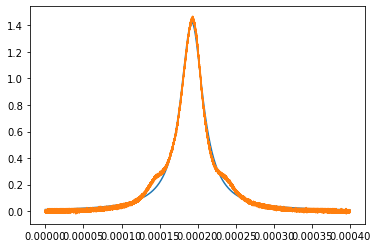

In [262]:
p0 = np.array([max(d), 0.0001923, 0.0000185])
p=p0.copy()
for j in range(20):
    pred =  f(p,t)
    grad = ndiff2(f,p,t)
    r=d-pred
    err=(r**2).sum()
    r=np.matrix(r).transpose()
    grad=np.matrix(grad)

    lhs=grad.transpose()*grad
    rhs=grad.transpose()*r
    dp=np.linalg.inv(lhs)*(rhs)
    for jj in range(p.size):
        p[jj]=p[jj]+dp[jj]
    print(p,err)
plt.plot(t,pred)
plt.plot(t,d)

In [263]:
def f2(p,t):
    lorentz1 = p[0]/(1 + ((t - p[1])/p[2])**2)
    lorentz2 = p[3]/(1 + ((t - (p[1]-p[4]))/p[2])**2)
    lorentz3 = p[5]/(1 + ((t - (p[1]+p[4]))/p[2])**2)
    return lorentz1+lorentz2+lorentz3

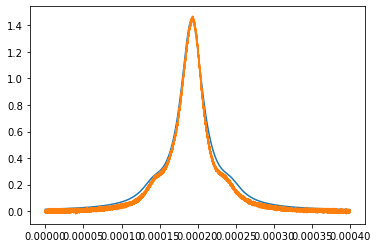

In [264]:
guess2 = np.array([1.42113712e+00, 1.92341699e-04, 1.79752584e-05, 0.1,
 5.1e-05, 0.1])
plt.plot(t,f2(guess2,t))
plt.plot(t,d)

[1.44051706e+00 1.92504117e-04 1.59921472e-05 9.88696908e-02
 4.42657394e-05 6.81362345e-02] 128.56792995507115
[1.44272942e+00 1.92579908e-04 1.60885286e-05 1.03308525e-01
 4.48028639e-05 6.38979157e-02] 21.850523345356336
[1.44303906e+00 1.92576987e-04 1.60601016e-05 1.03962295e-01
 4.45082687e-05 6.49864723e-02] 21.2589062108689
[1.44297951e+00 1.92578868e-04 1.60666109e-05 1.03886916e-01
 4.45832274e-05 6.46587697e-02] 21.24813017505862
[1.44299580e+00 1.92578423e-04 1.60647124e-05 1.03916660e-01
 4.45627711e-05 6.47520688e-02] 21.247337109306876
[1.44299146e+00 1.92578549e-04 1.60652184e-05 1.03909142e-01
 4.45683558e-05 6.47271575e-02] 21.247278852253647
[1.44299265e+00 1.92578515e-04 1.60650798e-05 1.03911226e-01
 4.45668385e-05 6.47339866e-02] 21.24727452986363
[1.44299233e+00 1.92578524e-04 1.60651175e-05 1.03910661e-01
 4.45672517e-05 6.47321323e-02] 21.247274209949204
[1.44299241e+00 1.92578521e-04 1.60651072e-05 1.03910815e-01
 4.45671393e-05 6.47326373e-02] 21.247274186226

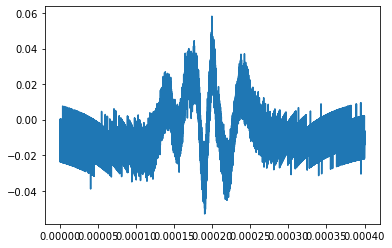

In [265]:
guess2 = np.array([1.42113712e+00, 1.92341699e-04, 1.79752584e-05, 0.1,
 5.1e-05, 0.1])
p=guess2.copy()
for j in range(20):
    pred =  f2(p,t)
    grad = ndiff2(f2,p,t)
    r=d-pred
    err=(r**2).sum()
    r=np.matrix(r).transpose()
    grad=np.matrix(grad)

    lhs=grad.transpose()*grad
    rhs=grad.transpose()*r
    dp=np.linalg.inv(lhs)*(rhs)
    for jj in range(p.size):
        p[jj]=p[jj]+dp[jj]
    print(p,err)
#plt.plot(t,d)
plt.plot(t,d-pred)

In [266]:
from re import X
from tkinter import Y


def get_step(trial_step):
    if len(trial_step.shape)==1:
        return np.random.randn(len(trial_step))*trial_step
    else:
        L=np.linalg.cholesky(trial_step)
        return L@np.random.randn(trial_step.shape[0])


def lorentz(pars,x):
    lorentz1 = pars[0]/(1 + ((t - pars[1])/pars[2])**2)
    lorentz2 = pars[3]/(1 + ((t - (pars[1]-pars[4]))/pars[2])**2)
    lorentz3 = pars[5]/(1 + ((t - (pars[1]+pars[4]))/pars[2])**2)
    return lorentz1+lorentz2+lorentz3

def lorentz_chisq(pars,data):
    x=data['x']
    y=data['y']
    errs=data['errs']

    pred=lorentz(pars,x)
    chisq=np.sum((pred-y)**2/errs**2)
    return chisq

def num_derivs(fun,pars,dp,x):
    A=np.empty([len(x),len(pars)])
    for i in range(len(pars)):
        pp=pars.copy()
        pp[i]=pars[i]+dp[i]
        y_right=fun(pp,x)
        pp[i]=pars[i]-dp[i]
        y_left=fun(pp,x)
        A[:,i]=(y_right-y_left)/(2*dp[i])
    return A
def newton(fun,pars,dp,x,y,niter=10):
    for i in range(niter):
        pred=fun(pars,x)
        r=y-pred
        A=num_derivs(fun,pars,dp,x)
        lhs=A.T@A
        rhs=A.T@r
        step=np.linalg.inv(lhs)@rhs
        pars=pars+step
        print('pars are ',pars)
    return pars,np.linalg.inv(lhs)

def run_chain(fun,pars,trial_step,data,nstep=20000,T=1):
    npar=len(pars)
    chain=np.zeros([nstep,npar])
    chisq=np.zeros(nstep)
    chain[0,:]=pars
    chi_cur=fun(pars,data)
    chisq[0]=chi_cur
    for i in range(1,nstep):
        pp=pars+get_step(trial_step)
        new_chisq=fun(pp,data)
        accept_prob=np.exp(-0.5*(new_chisq-chi_cur)/T)
        if np.random.rand(1)<accept_prob:
            pars=pp
            chi_cur=new_chisq
        chain[i,:]=pars
        chisq[i]=chi_cur
    return chain,chisq

def process_chain(chain,chisq,T=1.0):
    dchi=chisq-np.min(chisq)
    #density in chain is exp(-0.5*chi^2/T), but
    #we wanted it to be exp(-0.5*chi^2)
    #so, we want to downweight by ratio, which is
    #exp(-0.5*chi^2*(1-1/T)).  We'll calculate the mean
    #and standard deviation of the chain, but will also
    #return the weights so you could calculate whatever you want

    wt=np.exp(-0.5*dchi*(1-1/T)) #the magic line that importance samples

    #calculate the weighted sum of the chain and the chain squared
    npar=chain.shape[1]
    tot=np.zeros(npar)
    totsqr=np.zeros(npar)
    for i in range(npar):
        tot[i]=np.sum(wt*chain[:,i])
        totsqr[i]=np.sum(wt*chain[:,i]**2)
    #divide by sum or weights
    mean=tot/np.sum(wt)
    meansqr=totsqr/np.sum(wt)

    #variance is <x^2>-<x>^2
    var=meansqr-mean**2
    return mean,np.sqrt(var),wt
    

stuff=np.load('sidebands.npz')
x=stuff['time']
y=stuff['signal']


noise=0.01
N=noise**2


pars=np.asarray([1.44e+00, 1.92e-04, 1.60e-05, 1.0391e-01,
 4.45e-05, 6.47e-02])

 pars=np.asarray([1.44e+00, 1.92e-04, 1.60e-05, 1.0391e-01,
 4.45e-05, 6.47e-02])

dp=np.full(pars.size,3e-9)
fitp,curve=newton(lorentz,pars,dp,x,y)
curve=curve*N #since we didn't include the noise in Newton's method
data={}
data['x']=x
data['y']=y
data['errs']=noise

chain,chivec=run_chain(lorentz_chisq,fitp,curve,data)
nsig=5

mean,errs,wts=process_chain(chain,chivec)

npar=chain.shape[1]
for i in range(npar):
    t1=mean[i]+errs[i]*nsig
    frac=(np.sum(chain[:,i]>t1)+np.sum(chain[:,i]<t2))/chain.shape[0]

    



IndentationError: unexpected indent (3169059487.py, line 107)

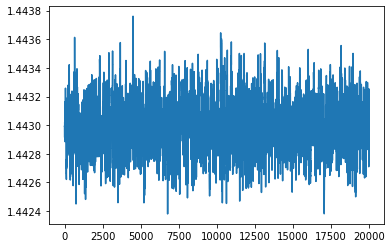

In [ ]:
plt.plot(chain[:,0])

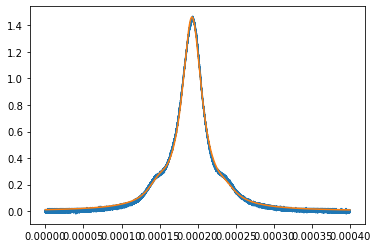

In [ ]:
giga_p = np.array([1.44299240e+00, 1.92578522e-04, 1.60651091e-05, 1.03910786e-01,
 4.45671605e-05, 6.47325421e-02])

plt.plot(t,d)
plt.plot(t,f2(giga_p,t))